# Model Validation

In [4]:
import warnings
warnings.filterwarnings('ignore')

# I. Model Capacity

* import Packages

In [5]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

* pandas DataFrame
 - 'Electric.csv' From github

In [6]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
Elec.describe()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,223.072005
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,100.901957
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,60.100000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,129.925000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,189.500000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,316.675000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,431.000000


In [7]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


* 산점도(surface_area vs. electricity)

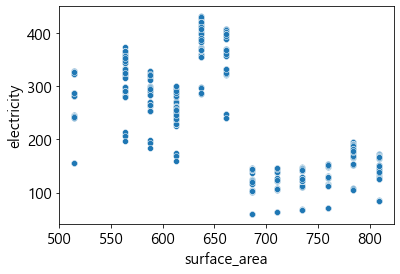

In [9]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

> ## 1) 1차 모델 시각화

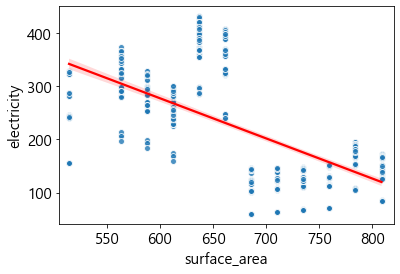

In [11]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

> ## 2) 2차 모델 시각화

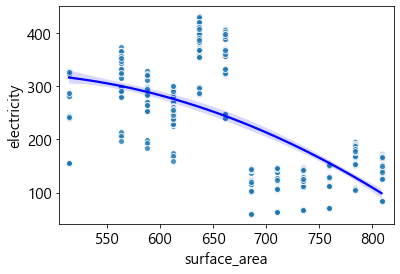

In [12]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2)             # 2차원
plt.xlim(505, 820)
plt.show()

> ## 3) 5차 모델 시각화

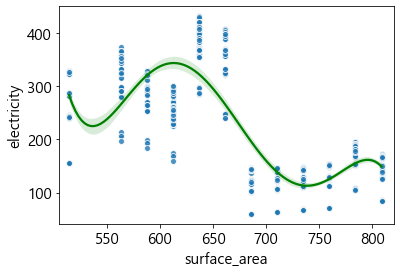

In [13]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)    # 5차원
plt.xlim(505, 820)
plt.show()

> ## 4) 9차 모델 시각화

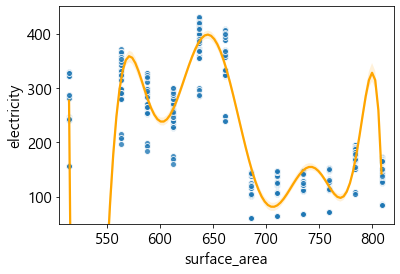

In [14]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

> ## 5) 4개 모델 비교 시각화

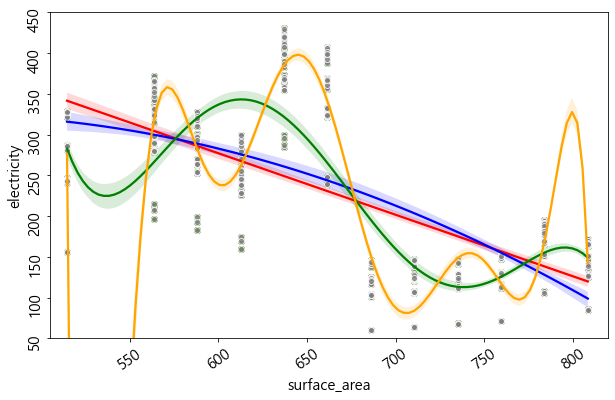

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# II. Training Error
* import Packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

* pandas DataFrame
 - 'Electric.csv' From github

In [18]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## 1) 1차 모델 Training Error

* X_train and y_train

In [19]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

* 모델 생성

In [20]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [21]:
print(Model_1.coef_)        # W
print(Model_1.intercept_)   # b

[-0.75387157]
729.4538243006992


* y_hat(예측값) 생성

In [22]:
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [23]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426347

> ## 2) 5차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 5)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [26]:
X_train

,surface_area
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5
...,...
763,784.0
764,808.5
765,808.5
766,808.5


In [25]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [27]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

* 5차 모델 생성

In [28]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [30]:
np.set_printoptions(suppress = True, precision = 10)

print(Model_5.coef_)            # W
print(Model_5.intercept_)       # b

[-0.0003155139 -0.1029295461  0.0003787613 -0.0000005032  0.0000000002]
2906.2084288541437


* y_hat(예측값) 생성

In [31]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

* MSE(Mean Squared Error) 계산

In [32]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328803677

> ## 3) 9차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 9)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [34]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

* 모델 생성

In [35]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [36]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258376361584


* y_hat(예측값) 생성

In [37]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

* MSE(Mean Squared Error) 계산

In [38]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908144376

> ## 4) 3개 모델 Training Error 비교

In [39]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328803677
9차 모델 :  4086.7199908144376


> ## 5) 잔차(Residual) 시각화

* 1차 모델

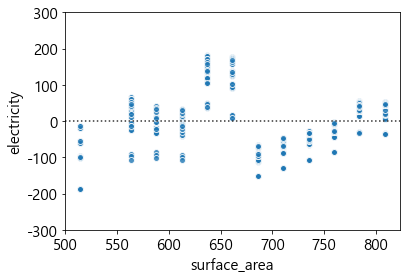

In [40]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 1, 
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

* 5차 모델

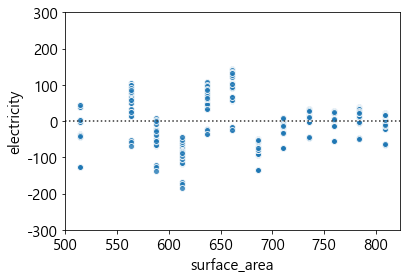

In [41]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

* 9차 모델

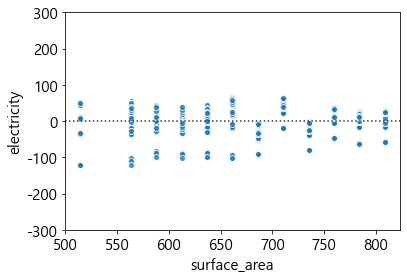

In [42]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 9,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

# III. Testing Error
* import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

* pandas DataFrame
 - 'Electric.csv' From github

In [43]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

> ## Train_Data vs. Test_Data

### (1) DataFrame Split
* 8:2 Split(614:154)
* 80% Train_DF & 20% Test_DF

In [44]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, 
                                    random_state = 2045)

In [45]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

* 80% TR_Elec DataFrame

In [46]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


* 20% TE_Elec DataFrame

In [47]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


### (2) Array Split
* X_train, X_test & y_train, y_test

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

* 80% X_train Array

In [50]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


* 80% y_train Array

In [51]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

### (3) Distribution Visualization
* Train Data

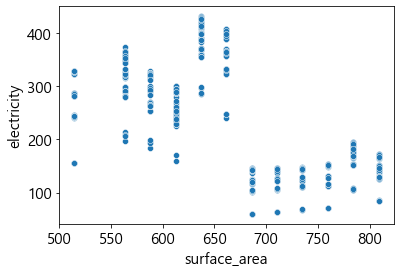

In [52]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

* Test Data

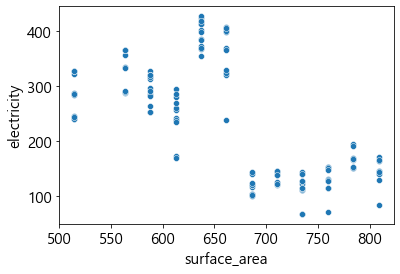

In [53]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

> ## 1) 1차 모델 Testing Error

* Train_Data로 모델 생성

In [54]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [55]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

* Test_Data로 MSE(Mean Squared Error) 계산

In [56]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.17654762927

> ## 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [58]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [59]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [60]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.591247617033

> ## 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [62]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [63]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [64]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067052922

> ## 4) 3개 모델 Testing Error 비교

In [65]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.17654762927
5차 모델 :  4330.591247617033
9차 모델 :  4238.689067052922


# 
# 
# 
# The End
# 
# 
# 